In [1]:
import tensorflow as tf
import os
import pathlib
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [58]:
def load_data():
    
    train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        validation_split=0.05)
    
    train_dir = './data/train'
    
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=18,
        class_mode='categorical',
        subset='training'
    )
    
    validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=18,
    class_mode='categorical',
    subset='validation')
    
    return train_generator, validation_generator

In [48]:
_, __ = load_data()

Found 4527 images belonging to 5 classes.
Found 1129 images belonging to 5 classes.


In [ ]:
_.

In [64]:
def build_model(optimizer='adamax'):
    
    base = tf.keras.applications.ResNet152(include_top=False, weights='imagenet',input_shape=[224,224,3])
    base.trainable = False
    base.summary()
    
    #define final model and use the extracted layer (this is called feature extraction)
    
    model = tf.keras.models.Sequential()
    
    model.add(base)
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu' ))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(5, activation='softmax'))
    
#     for i in range (num_cnn):
#         model.add(
#         tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', 
#                                input_shape=(300, 300, 3), kernel_regularizer='l2'))
#         model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))
#         model.add(tf.keras.layers.BatchNormalization())
#         model.add(tf.keras.layers.Dropout(rate=0.3))
    
#     model.add(tf.keras.layers.Flatten())
#     model.add(tf.keras.layers.Dense(64, activation='relu'))
#     model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.Dropout(rate=0.3))
    
#     model.add(tf.keras.layers.Dense(32, activation='relu'))
#     model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.Dropout(rate=0.3))
#     model.add(tf.keras.layers.Dense(5, activation='softmax'))
    
    if optimizer=='adamax':
        model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    else:
        model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        
    return model

In [60]:
def train_model(train_generator, validation_generator, model, epochs):
    
    model_save = tf.keras.callbacks.ModelCheckpoint("Model", 
                             save_best_only = True, 
                             save_weights_only = True,
                             monitor = 'val_loss', 
                             mode = 'min', verbose = 1)
    checkpoint = tf.keras.callbacks.ModelCheckpoint('model{epoch:08d}.h5', period=5)
    
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator)/train_generator.batch_size,
        epochs=epochs,
        verbose=1,
        validation_data = validation_generator,
        validation_steps=len(validation_generator)/validation_generator.batch_size,
        callbacks=[checkpoint]
    )
    return history

In [61]:
def train(epochs=10):
    
    train_generator, validation_generator = load_data()
    model = build_model()
    history = train_model(train_generator, validation_generator, model, epochs)
    
    return model, history

In [62]:
def visualise(history, epochs=10):
    history = history.history
    epoch = [i+1 for i in range(1, epochs+1)]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    loss = history['loss']
    val_loss = history['val_loss']
    accuracy = history['accuracy']
    val_accuracy = history['val_accuracy']
    axes[0].plot(epoch, loss, label='loss')
    axes[0].plot(epoch, val_loss, label='val_loss')
    axes[0].legend()
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Loss vs Epoch')
    axes[1].plot(epoch, accuracy, label='accuracy')
    axes[1].plot(epoch, val_accuracy, label='val_accuracy')
    axes[1].legend()
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Accuracy vs Epoch')
    
    return

### Trainings

In [ ]:
import datetime
print('---------start----------')
now = datetime.datetime.now()
print(now)
print('\n')
model, history = train(epochs=30)
print('---------finish----------')
finish = datetime.datetime.now()
print('\n')
print(finish)
print(finish - now)

---------start----------
2021-03-11 08:01:36.380698


Found 5376 images belonging to 5 classes.
Found 280 images belonging to 5 classes.
Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64)

Epoch 1/30
16/16 [===========================>..] - ETA: 20s - loss: 8.5391 - accuracy: 0.4306

In [37]:
history.history

{'loss': [2.397864320206403,
  1.6095516482988994,
  1.5777400493621827,
  1.4973941445350647,
  1.4483723362286887,
  1.462523631254832,
  1.4442293882369994,
  1.474255871772766,
  1.402331288655599,
  1.4356756130588493,
  1.3825470368067423,
  1.473457117875417,
  1.469696511393008,
  1.5230551997820536,
  1.4765583515167235,
  1.4459296425183614,
  1.3785750243974768,
  1.4589583277702332,
  1.369586968421936,
  1.3782280604044597,
  1.3877205530802408,
  1.3272998293240865,
  1.351189120610555,
  1.324467420578003,
  1.328330986874558,
  1.292592563231786,
  1.3163451353708904,
  1.2912368575731914,
  1.2334622758686742,
  1.3044558445612588,
  1.2169470091660817,
  1.2465775946776072,
  1.2480731014423945,
  1.3053179721037547,
  1.2598849713802338,
  1.361918336172965,
  1.250199067592621,
  1.246370397011439,
  1.4214427649974823,
  1.3733463128407797,
  1.175619637966156,
  1.198186029990514,
  1.2212303107398808,
  1.2300504883130392,
  1.2858593066533406,
  1.28435006936391

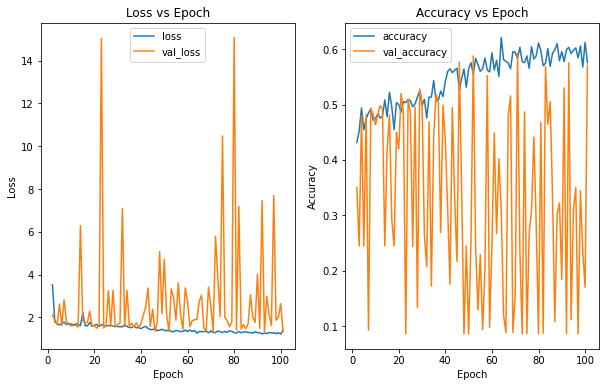

In [47]:
# (model_, history_) = history[]
visualise(history, epochs=100)